# **CSE440: Natural Language Processing II (LAB)**
---
# **Lab Project**  

---


# **Group - 3**##
---
## Members:
### 23241066 - Nafim Rahman
### 24141071 - Nawroz Haseen Tumul
### 23241051 - Salim Miah
---


#Mounting Drive

In [ ]:
#mounting drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#Loading Train data

In [ ]:
#loading and reading data
import pandas as pd

# Load the dataset
train_dataset_path='/content/drive/MyDrive/NLP Project data/Dataset_A_POS_train.csv'

#reading data
train_data=pd.read_csv(train_dataset_path)

#EDA

##Data Overview

In [ ]:
# Shows the first few rows of the dataset
print("First few rows of the dataset:")
print(train_data.head())

# Display the basic information about the dataset (shape, column types)
print("\nBasic Information about the dataset:")
train_data_info = train_data.info()

# Display summary statistics (numerical columns)
print("\nSummary Statistics of the dataset:")
train_data_summary = train_data.describe()

# Show the shape (rows, columns) of the dataset
print("\nShape of the dataset (rows, columns) :")
print(train_data.shape)

# Show column names
print("\nColumn names in the dataset:")
print(train_data.columns)


First few rows of the dataset:
   Sentence #                                           Sentence  \
0           1  AU officials reported fresh fighting Sunday , ...   
1           2  Also Saturday , in an unrelated development , ...   
2           3  They replied , " We would willingly have helpe...   
3           4          He said he has ordered an investigation .   
4           5  World famous Russian cellist and conductor , M...   

                                                 POS  
0  ['NNP', 'NNS', 'VBD', 'JJ', 'NN', 'NNP', ',', ...  
1  ['RB', 'NNP', ',', 'IN', 'DT', 'JJ', 'NN', ','...  
2  ['PRP', 'VBD', ',', '``', 'PRP', 'MD', 'RB', '...  
3  ['PRP', 'VBD', 'PRP', 'VBZ', 'VBN', 'DT', 'NN'...  
4  ['NNP', 'JJ', 'JJ', 'NN', 'CC', 'NN', ',', 'NN...  

Basic Information about the dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19183 entries, 0 to 19182
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0  

##Missing Value Analysis

Missing values per column:
Sentence #    0
Sentence      0
POS           0
dtype: int64

Percentage of missing values per column:
Sentence #    0.0
Sentence      0.0
POS           0.0
dtype: float64


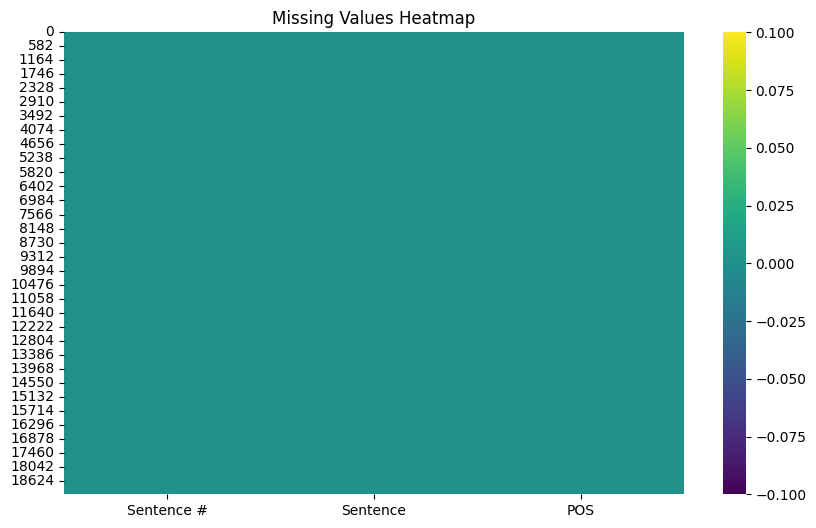

In [ ]:
# Check for missing values in the dataset
missing_values = train_data.isnull().sum()

# Display the number of missing values for each column
print("Missing values per column:")
print(missing_values)

# Calculate the percentage of missing values for each column
missing_percentage = (missing_values / len(train_data)) * 100
print("\nPercentage of missing values per column:")
print(missing_percentage)

# Optionally, visualize missing values (using heatmap for better visualization)
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.heatmap(train_data.isnull(), cbar=True, cmap='viridis')
plt.title("Missing Values Heatmap")
plt.show()


##Class Distribution/Label Frequency Analysis

Class Distribution:
'NN',      57949
'NNP',     47773
'IN',      46767
'DT',      33600
'JJ',      29527
           ...  
',']           1
['PDT',        1
'JJ']          1
';']           1
'RRB']         1
Name: count, Length: 84, dtype: int64


<ipython-input-7-d443c3e2402d>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=flattened_tags, order=tag_distribution.index, palette='viridis')


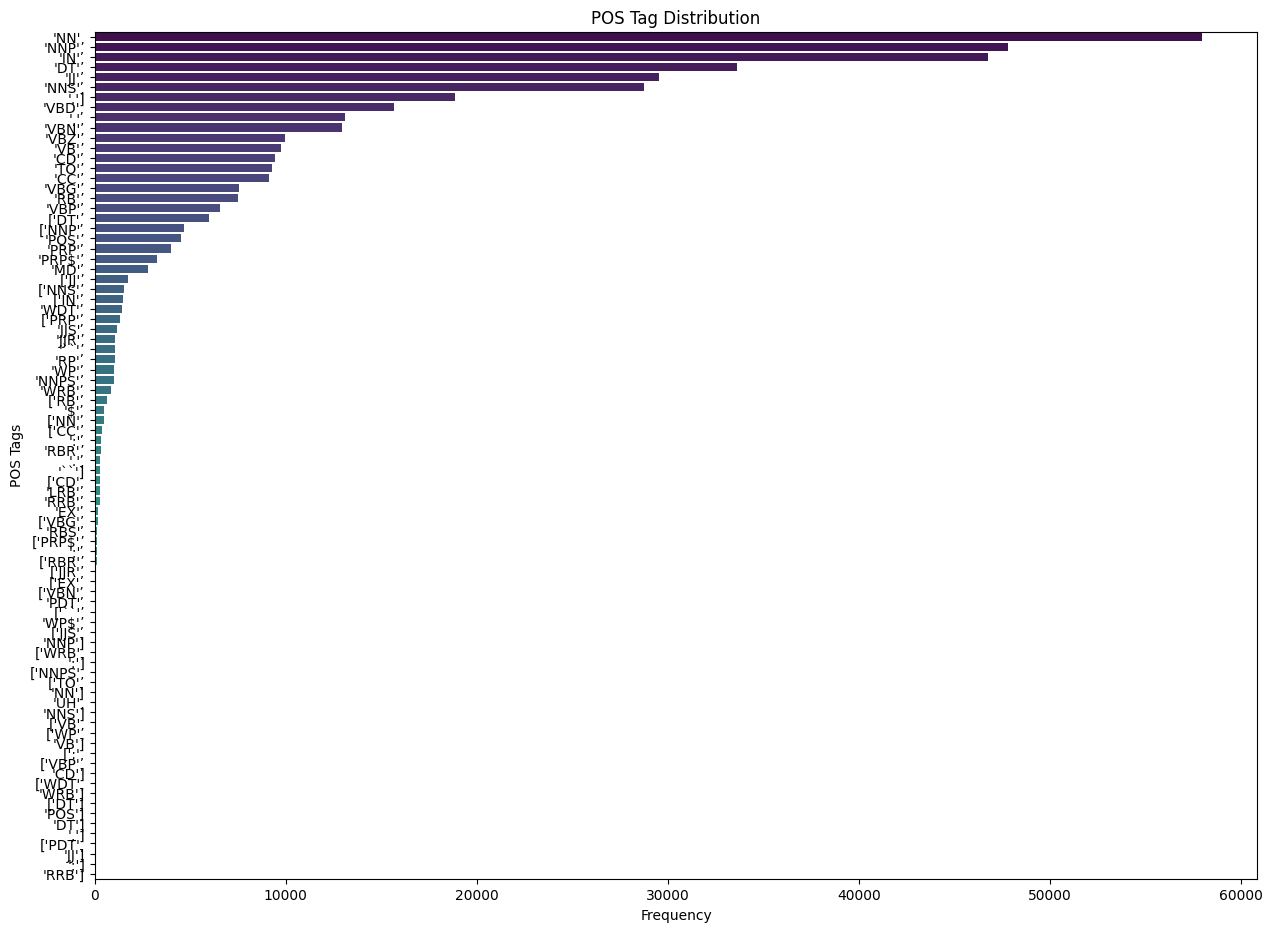


Percentage of each POS tag:
'NN',      13.831367
'NNP',     11.402541
'IN',      11.162428
'DT',       8.019706
'JJ',       7.047555
             ...    
',']        0.000239
['PDT',     0.000239
'JJ']       0.000239
';']        0.000239
'RRB']      0.000239
Name: count, Length: 84, dtype: float64


In [ ]:
# Flatten the POS tag sequences if they are in lists or arrays
flattened_tags = [tag for sublist in train_data['POS'].apply(lambda x: x.split()) for tag in sublist]

# Count the frequency of each POS tag
tag_distribution = pd.Series(flattened_tags).value_counts()

# Show the distribution of POS tags
print("Class Distribution:")
print(tag_distribution)

# Plot the distribution of POS tags
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(15, 11))
sns.countplot(y=flattened_tags, order=tag_distribution.index, palette='viridis')
plt.title("POS Tag Distribution")
plt.xlabel("Frequency")
plt.ylabel("POS Tags")
plt.show()

# Calculate the percentage of each POS tag
tag_percentage = (tag_distribution / len(flattened_tags)) * 100
print("\nPercentage of each POS tag:")
print(tag_percentage)

##POS Tag Distribution

Top 10 Most Common POS Tags:
   POS Tag  Frequency
4    'NN',      57949
5   'NNP',      47773
7    'IN',      46767
11   'DT',      33600
3    'JJ',      29527
1   'NNS',      28739
12    '.']      18837
2   'VBD',      15672
6     ',',      13098
20  'VBN',      12942


<ipython-input-10-ced434c66f12>:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Frequency', y='POS Tag', data=pos_tag_freq_df.head(10), palette='viridis')


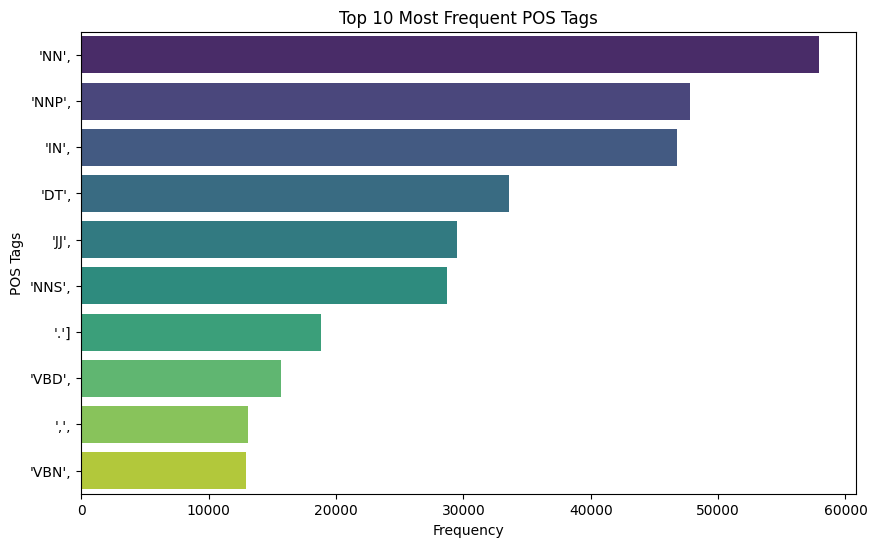

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

# Flatten the POS tag sequences (e.g., splitting the tags into individual tokens)
all_pos_tags = [tag for sublist in train_data['POS'].apply(lambda x: str(x).split()) for tag in sublist]

# Get the frequency of each POS tag (token frequency)
pos_tag_counts = Counter(all_pos_tags)

# Convert to DataFrame for easier plotting
pos_tag_freq_df = pd.DataFrame(pos_tag_counts.items(), columns=['POS Tag', 'Frequency'])

# Sort by frequency in descending order
pos_tag_freq_df = pos_tag_freq_df.sort_values(by='Frequency', ascending=False)

# Show the top 10 most common POS tags
print("Top 10 Most Common POS Tags:")
print(pos_tag_freq_df.head(10))

# Plotting the frequency of the top 10 POS tags
plt.figure(figsize=(10, 6))
sns.barplot(x='Frequency', y='POS Tag', data=pos_tag_freq_df.head(10), palette='viridis')
plt.title("Top 10 Most Frequent POS Tags")
plt.xlabel("Frequency")
plt.ylabel("POS Tags")
plt.show()


##Number of unique POS Tags

In [ ]:
import ast

if train_data["POS"].apply(lambda x: isinstance(x, str) and x.startswith('[')).any():
    train_data["POS"] = train_data["POS"].apply(ast.literal_eval)

all_tags = [tag for sublist in train_data["POS"] for tag in (sublist if isinstance(sublist, list) else [sublist])]

# Get unique POS tags
unique_tags = set(all_tags)
num_unique_tags = len(unique_tags)

print(f"Number of unique POS tags: {num_unique_tags}")
print("Unique POS tags:", sorted(unique_tags))

Number of unique POS tags: 41
Unique POS tags: ['$', ',', '.', ':', ';', 'CC', 'CD', 'DT', 'EX', 'IN', 'JJ', 'JJR', 'JJS', 'LRB', 'MD', 'NN', 'NNP', 'NNPS', 'NNS', 'PDT', 'POS', 'PRP', 'PRP$', 'RB', 'RBR', 'RBS', 'RP', 'RRB', 'TO', 'UH', 'VB', 'VBD', 'VBG', 'VBN', 'VBP', 'VBZ', 'WDT', 'WP', 'WP$', 'WRB', '``']


##Text Length Distribution

Max length: 104
Min length: 1
Average length: 21.84037950268467

Top 5 Most Common Sentence Lengths:
   Sentence Length (No. of Tokens)  count
0                               20   1002
1                               22    971
2                               21    953
3                               18    939
4                               19    923



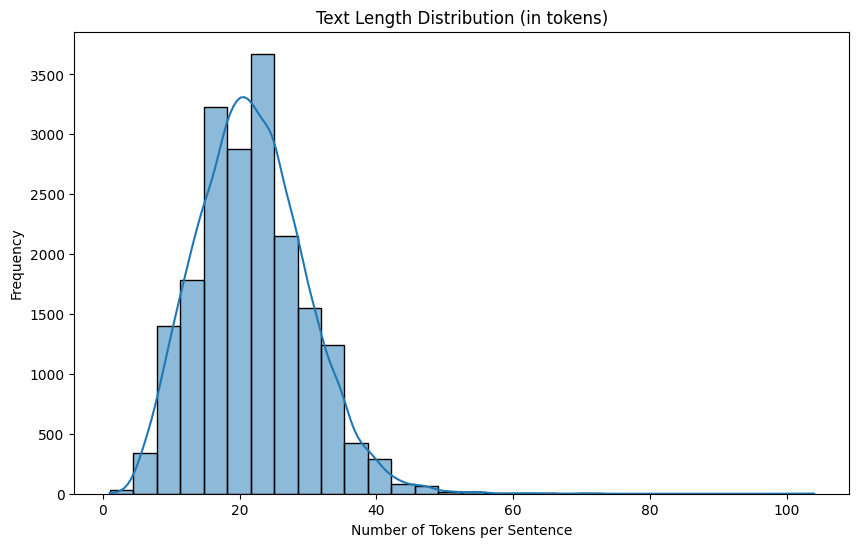

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Measure the number of words/tokens per sentence
train_data['text_length'] = train_data['Sentence'].apply(lambda x: len(str(x).split()))

# Basic stats
print("Max length:", train_data['text_length'].max())
print("Min length:", train_data['text_length'].min())
print("Average length:", train_data['text_length'].mean())

# Show the top 5 most common text lengths
top_5_lengths = train_data['text_length'].value_counts().head(5)
print("\nTop 5 Most Common Sentence Lengths:")
print(top_5_lengths.reset_index().rename(columns={'index': 'Frequency', 'text_length': 'Sentence Length (No. of Tokens)'}))
print()

# Plotting the distribution
plt.figure(figsize=(10, 6))
sns.histplot(train_data['text_length'], bins=30, kde=True)
plt.title("Text Length Distribution (in tokens)")
plt.xlabel("Number of Tokens per Sentence")
plt.ylabel("Frequency")
plt.show()


##Token Frequency Analysis

Top 10 Most Common Tokens (Words):
    Token  Frequency
16    the      21060
21      .      19102
6       ,      13096
9      in      10546
139    of      10452
12     to       9336
27      a       8269
15    and       7953
84    The       4518
33     's       4382


<ipython-input-9-90cef7769a51>:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Frequency', y='Token', data=token_freq_df.head(10), palette='viridis')


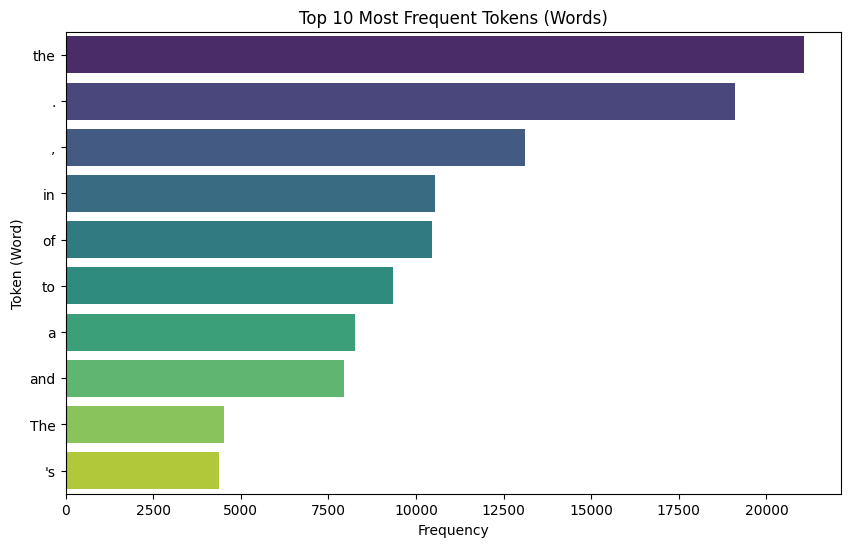

In [ ]:
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns

# Flatten the sequences of words/tokens (e.g., splitting the tokens into individual words)
all_tokens = [token for sublist in train_data['Sentence'].apply(lambda x: str(x).split()) for token in sublist]

# Get the frequency of each token (word frequency)
token_counts = Counter(all_tokens)

# Convert to DataFrame for easier plotting
token_freq_df = pd.DataFrame(token_counts.items(), columns=['Token', 'Frequency'])

# Sort by frequency in descending order
token_freq_df = token_freq_df.sort_values(by='Frequency', ascending=False)

# Show the top 10 most common tokens (words)
print("Top 10 Most Common Tokens (Words):")
print(token_freq_df.head(10))

# Plotting the frequency of the top 10 tokens
plt.figure(figsize=(10, 6))
sns.barplot(x='Frequency', y='Token', data=token_freq_df.head(10), palette='viridis')
plt.title("Top 10 Most Frequent Tokens (Words)")
plt.xlabel("Frequency")
plt.ylabel("Token (Word)")
plt.show()


##Unique Token and Vocabulary Analysis

In [ ]:
# Flatten the sequences of words/tokens (e.g., splitting the tokens into individual words)
all_tokens = [token for sublist in train_data['Sentence'].apply(lambda x: str(x).split()) for token in sublist]

# Calculate the number of unique tokens (vocabulary size)
unique_tokens = set(all_tokens)
vocabulary_size = len(unique_tokens)

# Print the results
print(f"Total number of tokens: {len(all_tokens)}")
print(f"Vocabulary size (unique tokens): {vocabulary_size}")

# Optionally, display the frequency of the most common unique tokens
from collections import Counter

token_counts = Counter(all_tokens)
most_common_tokens = token_counts.most_common(10)

print("\nTop 10 Most Common Tokens:")
for token, freq in most_common_tokens:
    print(f"{token}: {freq}")


Total number of tokens: 418964
Vocabulary size (unique tokens): 22909

Top 10 Most Common Tokens:
the: 21060
.: 19102
,: 13096
in: 10546
of: 10452
to: 9336
a: 8269
and: 7953
The: 4518
's: 4382


##Data Imbalance Analysis

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'POS' contains the POS tags (tokens)
# Calculate the frequency of each POS tag
pos_tag_counts = train_data['Sentence'].apply(lambda x: str(x).split()).explode().value_counts()

# Show the distribution of POS tags
print("POS Tag Distribution:")
print(pos_tag_counts)

# Plotting the distribution to visualize the imbalance
plt.figure(figsize=(12, 6))
sns.barplot(x=pos_tag_counts.index, y=pos_tag_counts.values, palette='viridis')
plt.title("POS Tag Distribution (Data Imbalance Analysis)")
plt.xlabel("POS Tags")
plt.ylabel("Frequency")
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.show()

# Calculate imbalance ratio (ratio of the most frequent class to the least frequent class)
max_frequency = pos_tag_counts.max()
min_frequency = pos_tag_counts.min()
imbalance_ratio = max_frequency / min_frequency

print(f"\nImbalance Ratio: {imbalance_ratio:.2f}")


##Outlier detection

Number of outliers detected: 154
Outliers:
       Sentence #                                           Sentence  \
133           134  The Al Aqsa Martyrs ' Brigades , the armed win...   
137           138  The modernization and integration of the easte...   
368           369  Economic growth dropped in 2009 , due mainly t...   
646           647  A spokesman for the Stamford , Conn. based com...   
1324         1325  Speaking to cardinals and bishops gathered in ...   
...           ...                                                ...   
18894       18895  As the number of mineworkers has declined stea...   
18935       18936  German Chancellor Gerhard Schroeder has asked ...   
19118       19119  Those signing urged Mr. Bush , among other thi...   
19145       19146  The World Organization for Animal Health said ...   
19146       19147  Georgia 's main economic activities include th...   

                                                     POS  text_length  
133    [DT, NNP, NNP

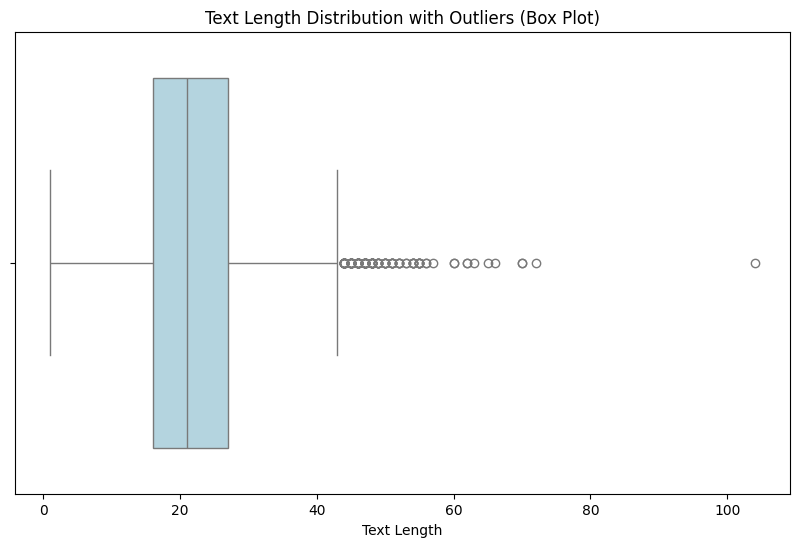

In [ ]:
# Calculate the length of each sentence (number of tokens)
train_data['text_length'] = train_data['Sentence'].apply(lambda x: len(str(x).split()))

# Calculate the Q1 (25th percentile) and Q3 (75th percentile) for text length
Q1 = train_data['text_length'].quantile(0.25)
Q3 = train_data['text_length'].quantile(0.75)

# Calculate the IQR (Interquartile Range)
IQR = Q3 - Q1

# Define outlier boundaries (typically 1.5*IQR)
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers (values outside the lower and upper bounds)
outliers = train_data[(train_data['text_length'] < lower_bound) | (train_data['text_length'] > upper_bound)]

# Show outliers
print(f"Number of outliers detected: {len(outliers)}")
print("Outliers:")
print(outliers)

# Plot the text length distribution with outliers highlighted
plt.figure(figsize=(10, 6))
sns.boxplot(x=train_data['text_length'], color='lightblue')
plt.title("Text Length Distribution with Outliers (Box Plot)")
plt.xlabel("Text Length")
plt.show()


##World Cloud

###POS Tags

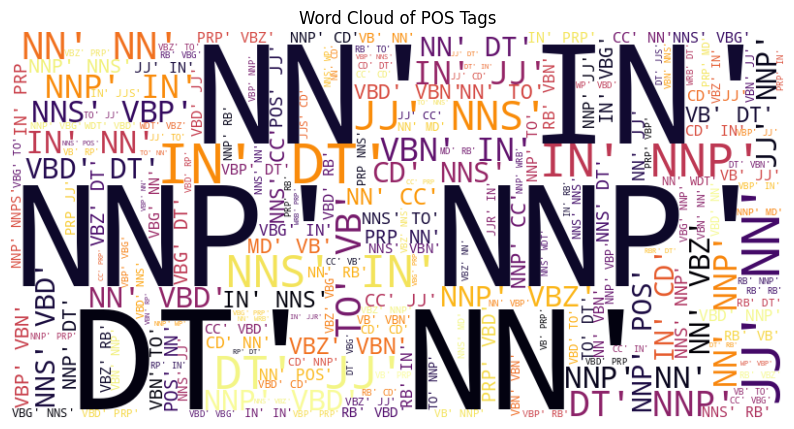

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Flatten the POS tag sequences (e.g., splitting the tags into individual tokens)
all_pos_tags = [tag for sublist in train_data['POS'].apply(lambda x: str(x).split()) for tag in sublist]

# Create a string from all the POS tags (this is necessary for wordcloud generation)
pos_tags_string = ' '.join(all_pos_tags)

# Create the word cloud object
wordcloud = WordCloud(width=800, height=400, background_color='white', colormap="inferno").generate(pos_tags_string)

# Plot the word cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Hide the axes
plt.title("Word Cloud of POS Tags")
plt.show()


###Sentence

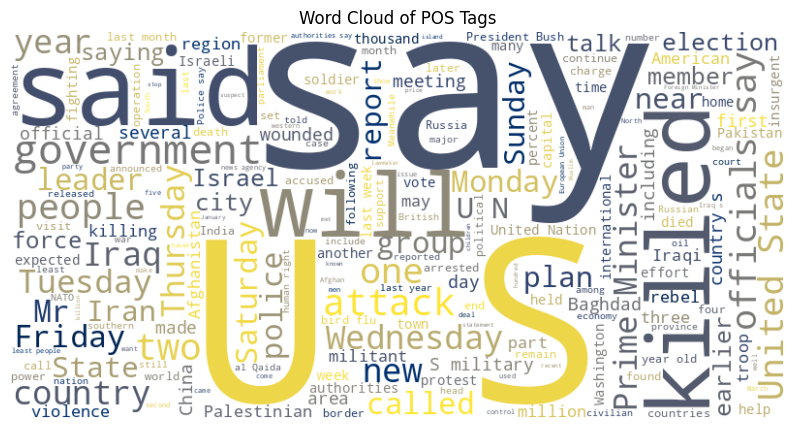

In [ ]:
# Flatten the POS tag sequences (e.g., splitting the tags into individual tokens)
all_pos_tags = [tag for sublist in train_data['Sentence'].apply(lambda x: str(x).split()) for tag in sublist]

# Create a string from all the POS tags (this is necessary for wordcloud generation)
pos_tags_string = ' '.join(all_pos_tags)

# Create the word cloud object
wordcloud = WordCloud(width=800, height=400, background_color='white', colormap="cividis").generate(pos_tags_string)

# Plot the word cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Hide the axes
plt.title("Word Cloud of POS Tags")
plt.show()


#Preprocessing


In [ ]:
!pip install tensorflow -q

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Load the training and testing datasets
train_file = 'Dataset_A_POS_train.csv'
test_file = 'Dataset_A_POS_test.csv'

train_data = pd.read_csv(train_file)
test_data = pd.read_csv(test_file)

# Preprocessing the sentences and POS tags
def preprocess_data(data):
    sentences = data['Sentence'].values
    pos_tags = data['POS'].apply(lambda x: eval(x))  # Convert string representation of list to actual list

    # Tokenizer for sentences
    tokenizer = Tokenizer()
    tokenizer.fit_on_texts(sentences)
    sequences = tokenizer.texts_to_sequences(sentences)

    # Pad sequences to ensure uniform input size
    max_length = max([len(seq) for seq in sequences])  # Find the max length
    padded_sequences = pad_sequences(sequences, maxlen=max_length, padding='post')

    # Encode POS tags (the target variable)
    label_encoder = LabelEncoder()
    pos_tags_flat = [tag for sublist in pos_tags for tag in sublist]  # Flatten list of POS tags
    label_encoder.fit(pos_tags_flat)

    # Convert POS tags to numerical format
    pos_tags_encoded = [label_encoder.transform(tag_list) for tag_list in pos_tags]

    # Pad POS tags to match the sentence length (padding tokens are set to 0)
    padded_pos_tags = pad_sequences(pos_tags_encoded, maxlen=max_length, padding='post', value=0)  # Pad with 0

    return np.array(padded_sequences), np.array(padded_pos_tags), tokenizer, label_encoder, max_length

# Apply preprocessing to training and test data
X_train, y_train, tokenizer, label_encoder, max_len = preprocess_data(train_data)
X_test, y_test, _, _, _ = preprocess_data(test_data)

# Check the shapes of the preprocessed data
print("X_train shape:", X_train.shape, "y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape, "y_test shape:", y_test.shape)


X_train shape: (19183, 89) y_train shape: (19183, 89)
X_test shape: (4796, 58) y_test shape: (4796, 58)


In [ ]:
# !pip install gensim

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 2.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.6/60.6 kB 2.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 26.7/26.7 MB 60.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.3/18.3 MB 58.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 38.6/38.6 MB 15.7 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 2.0.2
    Uninstalling numpy-2.0.2:
      Successfully uninstalled numpy-2.0.2
  Attempting uninstall: scipy
    Found existing installation: scipy 1.15.2
    Uninstalling scipy-1.15.2:
      Successfully uninstalled scipy-1.15.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
thinc 8.3.6 requires numpy<3.0.0,>=2.0.0, but you have numpy 1.26.4 which is incompatible.


In [ ]:
# !pip uninstall numpy
# !pip install numpy --upgrade
# !pip install --force-reinstall --no-cache-dir gensim pandas scikit-learn


Found existing installation: numpy 1.26.4
Uninstalling numpy-1.26.4:
  Would remove:
    /usr/local/bin/f2py
    /usr/local/lib/python3.11/dist-packages/numpy-1.26.4.dist-info/*
    /usr/local/lib/python3.11/dist-packages/numpy.libs/libgfortran-040039e1.so.5.0.0
    /usr/local/lib/python3.11/dist-packages/numpy.libs/libopenblas64_p-r0-0cf96a72.3.23.dev.so
    /usr/local/lib/python3.11/dist-packages/numpy.libs/libquadmath-96973f99.so.0.0.0
    /usr/local/lib/python3.11/dist-packages/numpy/*
Proceed (Y/n)? Y
  Successfully uninstalled numpy-1.26.4
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.0/62.0 kB 1.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.4/16.4 MB 54.1 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gensim 4.3.3 requires numpy<2.0,>=1.18.5, but you have numpy 2.2.5 which is incompatible.
tensorflow 2.18.0 requir

##Training Word2Vec Model

In [ ]:
import gensim
from gensim.models import Word2Vec
from tensorflow.keras.preprocessing.text import Tokenizer

# Tokenize sentences for Word2Vec model
sentences = [sentence.split() for sentence in train_data['Sentence'].values]

# Train a Word2Vec model using the Skip-gram approach
model_w2v = Word2Vec(sentences, vector_size=100, window=5, min_count=1, sg=1)

word_vector = model_w2v.wv['the']  # For example, to get the vector for the word 'the'
print("Word Vector for 'the':", word_vector)


Word Vector for 'the': [-3.65046144e-01  1.36362821e-01  6.10863008e-02 -1.39214918e-01
  3.11934471e-01 -2.29360610e-01 -3.10169589e-02  4.40631032e-01
 -4.25122947e-01 -2.93242931e-01  1.29703745e-01 -4.45079088e-01
  3.58568341e-01  2.77082533e-01  8.84406939e-02 -2.21310213e-01
  3.98634553e-01  1.75764173e-01 -7.95495808e-02 -4.33697045e-01
  3.06020916e-01 -1.68674421e-02  4.10498172e-01  8.69230484e-04
  4.11790945e-02  8.17229077e-02  1.50167942e-02  7.14778900e-02
 -2.62702376e-01 -1.14146478e-01 -2.45411918e-01  6.55201972e-02
  6.38808459e-02 -4.16480094e-01 -9.98952538e-02  1.16472401e-01
  3.90916765e-01 -2.22115651e-01 -4.61052150e-01 -4.06236976e-01
  2.39696614e-02  1.07075699e-01 -1.97881088e-01  1.12867244e-01
 -8.77113342e-02 -1.51841059e-01 -2.90217727e-01  9.99409938e-04
 -1.09654494e-01  2.57435143e-01  3.16466503e-02  2.91347295e-01
 -4.20632929e-01 -1.19333856e-01  1.26966044e-01 -3.12873393e-01
  1.93653479e-02  2.20228925e-01 -1.56945586e-02  4.08065580e-02
  

##Generating Embedding Matrix

In [ ]:
# Create embedding matrix
embedding_dim = 100  # This matches the vector_size we used in the Word2Vec model
embedding_matrix = np.zeros((len(tokenizer.word_index) + 1, embedding_dim))

for word, i in tokenizer.word_index.items():
    if word in model_w2v.wv:
        embedding_matrix[i] = model_w2v.wv[word]

# Check the shape of the embedding matrix
print("Embedding matrix shape:", embedding_matrix.shape)


Embedding matrix shape: (19005, 100)


##Building Models

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, SimpleRNN, LSTM, GRU, Bidirectional, Dense

def build_rnn_model(input_dim, output_dim, input_length, embedding_matrix):
  with tf.device('/GPU:1'):
    model = Sequential()
    model.add(Embedding(input_dim=input_dim, output_dim=embedding_matrix.shape[1],
                        weights=[embedding_matrix], input_length=input_length, trainable=False))
    model.add(SimpleRNN(64, activation='relu', return_sequences=True))
    model.add(Dense(output_dim, activation='softmax'))  # Softmax for multi-class classification
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

def build_lstm_model(input_dim, output_dim, input_length, embedding_matrix):
  with tf.device('/GPU:1'):
    model = Sequential()
    model.add(Embedding(input_dim=input_dim, output_dim=embedding_matrix.shape[1],
                        weights=[embedding_matrix], input_length=input_length, trainable=False))
    model.add(LSTM(64, activation='relu', return_sequences=True))
    model.add(Dense(output_dim, activation='softmax'))  # Softmax for multi-class classification
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

def build_gru_model(input_dim, output_dim, input_length, embedding_matrix):
  with tf.device('/GPU:1'):
    model = Sequential()
    model.add(Embedding(input_dim=input_dim, output_dim=embedding_matrix.shape[1],
                        weights=[embedding_matrix], input_length=input_length, trainable=False))
    model.add(GRU(64, activation='relu', return_sequences=True))
    model.add(Dense(output_dim, activation='softmax'))  # Softmax for multi-class classification
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

def build_bilstm_model(input_dim, output_dim, input_length, embedding_matrix):
  with tf.device('/GPU:1'):
    model = Sequential()
    model.add(Embedding(input_dim=input_dim, output_dim=embedding_matrix.shape[1],
                        weights=[embedding_matrix], input_length=input_length, trainable=False))
    model.add(Bidirectional(LSTM(64, activation='relu', return_sequences=True)))
    model.add(Dense(output_dim, activation='softmax'))  # Softmax for multi-class classification
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model


##Training Models

In [ ]:
# Set hyperparameters
input_dim = len(tokenizer.word_index) + 1  # +1 for padding token
output_dim = len(label_encoder.classes_)  # Number of unique POS tags
input_length = max_len  # Maximum sentence length

# Build and train each model
rnn_model = build_rnn_model(input_dim, output_dim, input_length, embedding_matrix)
rnn_model.summary()
rnn_model.fit(X_train, y_train, epochs=30, batch_size=64, validation_split=0.2)

lstm_model = build_lstm_model(input_dim, output_dim, input_length, embedding_matrix)
lstm_model.summary()
lstm_model.fit(X_train, y_train, epochs=30, batch_size=64, validation_split=0.2)

gru_model = build_gru_model(input_dim, output_dim, input_length, embedding_matrix)
gru_model.summary()
gru_model.fit(X_train, y_train, epochs=30, batch_size=64, validation_split=0.2)

bilstm_model = build_bilstm_model(input_dim, output_dim, input_length, embedding_matrix)
bilstm_model.summary()
bilstm_model.fit(X_train, y_train, epochs=30, batch_size=64, validation_split=0.2)


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_4 (Embedding)         │ ?                      │     1,900,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ simple_rnn_1 (SimpleRNN)        │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,900,500 (7.25 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 1,900,500 (7.25 MB)

Epoch 1/30
240/240 ━━━━━━━━━━━━━━━━━━━━ 14s 50ms/step - accuracy: 0.7618 - loss: 1.5082 - val_accuracy: 0.8479 - val_loss: 0.5688
Epoch 2/30
240/240 ━━━━━━━━━━━━━━━━━━━━ 20s 48ms/step - accuracy: 0.8492 - loss: 0.5551 - val_accuracy: 0.8598 - val_loss: 0.5108
Epoch 3/30
240/240 ━━━━━━━━━━━━━━━━━━━━ 21s 49ms/step - accuracy: 0.8579 - loss: 0.5119 - val_accuracy: 0.8636 - val_loss: 0.4871
Epoch 4/30
240/240 ━━━━━━━━━━━━━━━━━━━━ 20s 48ms/step - accuracy: 0.8630 - loss: 0.4863 - val_accuracy: 0.8665 - val_loss: 0.4682
Epoch 5/30
240/240 ━━━━━━━━━━━━━━━━━━━━ 20s 44ms/step - accuracy: 0.8660 - loss: 0.4671 - val_accuracy: 0.8689 - val_loss: 0.4551
Epoch 6/30
240/240 ━━━━━━━━━━━━━━━━━━━━ 21s 48ms/step - accuracy: 0.8672 - loss: 0.4581 - val_accuracy: 0.8706 - val_loss: 0.4567
Epoch 7/30
240/240 ━━━━━━━━━━━━━━━━━━━━ 20s 46ms/step - accuracy: 0.8676 - loss: 0.4549 - val_accuracy: 0.8713 - val_loss: 0.4395
Epoch 8/30
240/240 ━━━━━━━━━━━━━━━━━━━━ 21s 48ms/step - accuracy: 0.8709 - loss: 0.4398 - 

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_5 (Embedding)         │ ?                      │     1,900,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_2 (LSTM)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,900,500 (7.25 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 1,900,500 (7.25 MB)

Epoch 1/30
240/240 ━━━━━━━━━━━━━━━━━━━━ 33s 125ms/step - accuracy: 0.7443 - loss: 2768.0569 - val_accuracy: 0.7564 - val_loss: 2.8037
Epoch 2/30
240/240 ━━━━━━━━━━━━━━━━━━━━ 39s 115ms/step - accuracy: 0.7548 - loss: 2.8456 - val_accuracy: 0.7560 - val_loss: 2.4532
Epoch 3/30
240/240 ━━━━━━━━━━━━━━━━━━━━ 41s 114ms/step - accuracy: 0.7551 - loss: 2.5884 - val_accuracy: 0.7560 - val_loss: 2.3021
Epoch 4/30
240/240 ━━━━━━━━━━━━━━━━━━━━ 28s 115ms/step - accuracy: 0.7546 - loss: 2.9222 - val_accuracy: 0.7560 - val_loss: 3.1179
Epoch 5/30
240/240 ━━━━━━━━━━━━━━━━━━━━ 41s 114ms/step - accuracy: 0.7562 - loss: 4.8471 - val_accuracy: 0.7560 - val_loss: 2.7084
Epoch 6/30
240/240 ━━━━━━━━━━━━━━━━━━━━ 27s 115ms/step - accuracy: 0.7543 - loss: 3.8963 - val_accuracy: 0.7553 - val_loss: 5.0369
Epoch 7/30
240/240 ━━━━━━━━━━━━━━━━━━━━ 41s 115ms/step - accuracy: 0.7544 - loss: 3.8579 - val_accuracy: 0.7559 - val_loss: 3.4610
Epoch 8/30
240/240 ━━━━━━━━━━━━━━━━━━━━ 43s 124ms/step - accuracy: 0.7546 - loss

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_6 (Embedding)         │ ?                      │     1,900,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru_1 (GRU)                     │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,900,500 (7.25 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 1,900,500 (7.25 MB)

Epoch 1/30
240/240 ━━━━━━━━━━━━━━━━━━━━ 28s 104ms/step - accuracy: 0.7734 - loss: 1.9401 - val_accuracy: 0.8542 - val_loss: 0.5417
Epoch 2/30
240/240 ━━━━━━━━━━━━━━━━━━━━ 25s 104ms/step - accuracy: 0.8555 - loss: 0.5282 - val_accuracy: 0.8651 - val_loss: 0.4841
Epoch 3/30
240/240 ━━━━━━━━━━━━━━━━━━━━ 42s 110ms/step - accuracy: 0.8639 - loss: 0.4833 - val_accuracy: 0.8686 - val_loss: 0.4586
Epoch 4/30
240/240 ━━━━━━━━━━━━━━━━━━━━ 40s 106ms/step - accuracy: 0.8677 - loss: 0.4594 - val_accuracy: 0.8718 - val_loss: 0.4418
Epoch 5/30
240/240 ━━━━━━━━━━━━━━━━━━━━ 41s 105ms/step - accuracy: 0.8700 - loss: 0.4452 - val_accuracy: 0.8736 - val_loss: 0.4293
Epoch 6/30
240/240 ━━━━━━━━━━━━━━━━━━━━ 24s 101ms/step - accuracy: 0.8730 - loss: 0.4289 - val_accuracy: 0.8754 - val_loss: 0.4218
Epoch 7/30
240/240 ━━━━━━━━━━━━━━━━━━━━ 25s 105ms/step - accuracy: 0.8739 - loss: 0.4219 - val_accuracy: 0.8772 - val_loss: 0.4153
Epoch 8/30
240/240 ━━━━━━━━━━━━━━━━━━━━ 41s 105ms/step - accuracy: 0.8764 - loss: 0

Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_7 (Embedding)         │ ?                      │     1,900,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_1 (Bidirectional) │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,900,500 (7.25 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 1,900,500 (7.25 MB)

Epoch 1/30
240/240 ━━━━━━━━━━━━━━━━━━━━ 56s 214ms/step - accuracy: 0.7768 - loss: 2.5393 - val_accuracy: 0.8521 - val_loss: 0.6815
Epoch 2/30
240/240 ━━━━━━━━━━━━━━━━━━━━ 80s 205ms/step - accuracy: 0.8512 - loss: 20.5084 - val_accuracy: 0.6717 - val_loss: 1.4665
Epoch 3/30
240/240 ━━━━━━━━━━━━━━━━━━━━ 82s 205ms/step - accuracy: 0.7572 - loss: 7.0363 - val_accuracy: 0.8454 - val_loss: 0.6663
Epoch 4/30
240/240 ━━━━━━━━━━━━━━━━━━━━ 49s 205ms/step - accuracy: 0.8465 - loss: 0.6378 - val_accuracy: 0.8573 - val_loss: 0.5896
Epoch 5/30
240/240 ━━━━━━━━━━━━━━━━━━━━ 83s 210ms/step - accuracy: 0.8543 - loss: 0.5968 - val_accuracy: 0.8589 - val_loss: 0.5729
Epoch 6/30
240/240 ━━━━━━━━━━━━━━━━━━━━ 80s 204ms/step - accuracy: 0.8572 - loss: 0.5795 - val_accuracy: 0.8601 - val_loss: 0.5656
Epoch 7/30
240/240 ━━━━━━━━━━━━━━━━━━━━ 84s 212ms/step - accuracy: 0.8587 - loss: 0.5677 - val_accuracy: 0.8606 - val_loss: 0.5569
Epoch 8/30
240/240 ━━━━━━━━━━━━━━━━━━━━ 51s 212ms/step - accuracy: 0.8587 - loss: 

##Evaluating Models

150/150 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_

Accuracy: 0.26335246711776783
F1-Score (Weighted): 0.25133216091412297
Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       0.15      0.08      0.10      3313
           2       0.29      0.19      0.23      4789
           3       0.00      0.00      0.00        72
           4       0.00      0.00      0.00        22
           5       0.43      0.47      0.45      2472
           6       0.03      0.02      0.03      2521
           7       0.49      0.60      0.54      9795
           8       0.00      0.00      0.00        75
           9       0.38      0.47      0.42     12189
          10       0.12      0.07      0.09      7806
          11       0.00      0.00      0.00       291
          12       0.00      0.00      0.00       309
          13       0.00      0.00      0.00        67
          14       0.00      0.00      0.00       734
          15       0.22      0.29      0.

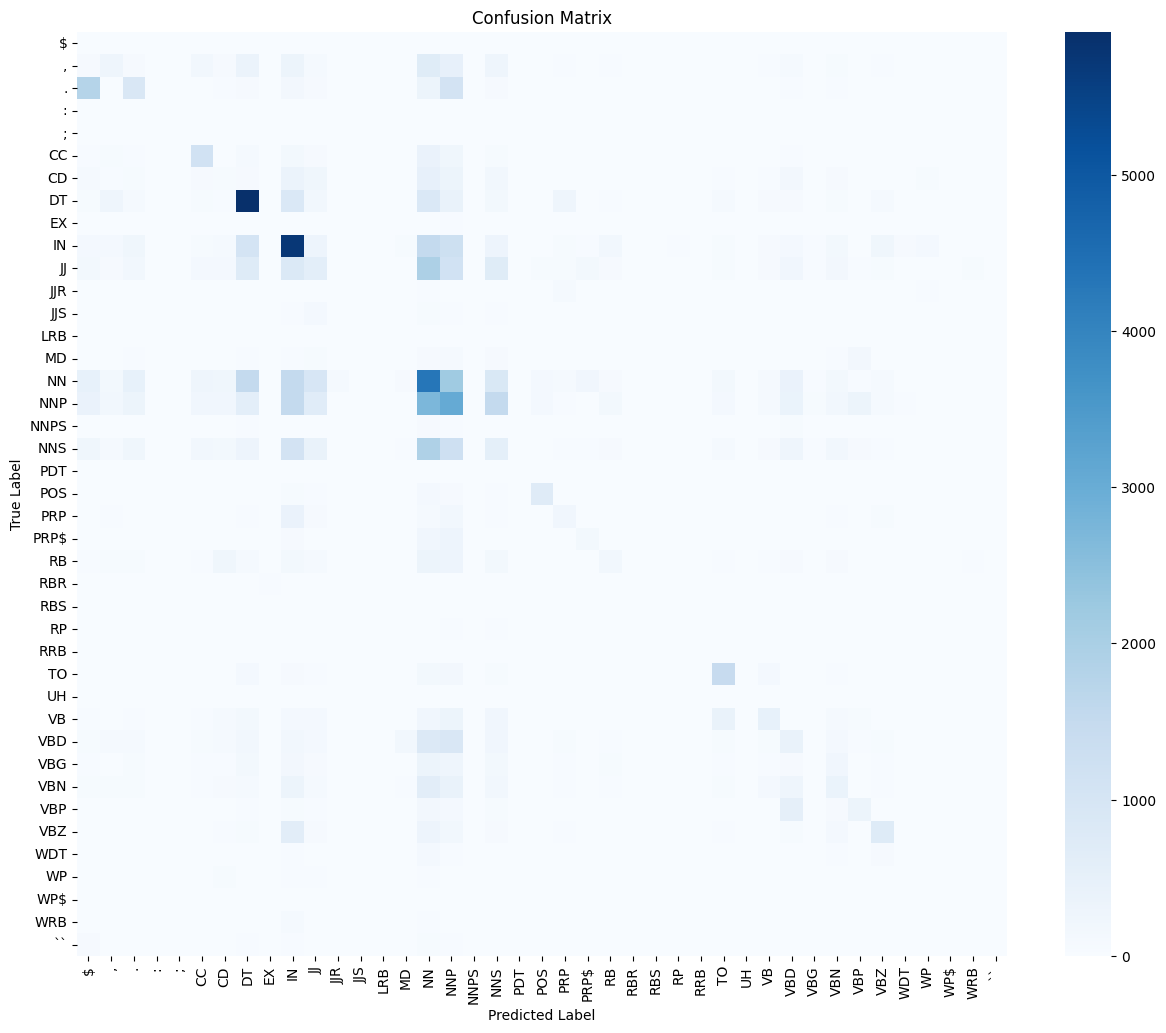

In [ ]:
from sklearn.metrics import accuracy_score, f1_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

def evaluate_model(model, X_test, y_test, label_encoder):
    # Predict the POS tags
    y_pred = model.predict(X_test)
    y_pred = np.argmax(y_pred, axis=-1)  # Get the predicted class (POS tag) for each word

    # Flatten the sequences and exclude padding values (0 or -1)
    mask = y_test != 0  # Mask padding tokens (0 is used for padding in the target)
    y_test_flat = y_test[mask]  # Flatten the true labels (ignoring padding)
    y_pred_flat = y_pred[mask]  # Flatten the predicted labels (ignoring padding)

    # Calculate accuracy, F1-score, and confusion matrix
    accuracy = accuracy_score(y_test_flat, y_pred_flat)
    f1 = f1_score(y_test_flat, y_pred_flat, average='weighted')
    report = classification_report(y_test_flat, y_pred_flat)
    cm = confusion_matrix(y_test_flat, y_pred_flat)

    print(f"Accuracy: {accuracy}")
    print(f"F1-Score (Weighted): {f1}")
    print(f"Classification Report:\n{report}")

    # Plot Confusion Matrix
    plt.figure(figsize=(15,12))
    sns.heatmap(cm, annot=False, fmt="d", cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
    plt.title("Confusion Matrix")
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.show()

    return accuracy,f1

# Evaluate the RNN model
rnn_accuracy,rnn_f1 = evaluate_model(rnn_model, X_test, y_test, label_encoder)


150/150 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_

Accuracy: 0.1489394054588307
F1-Score (Weighted): 0.11051128905403641
Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       0.00      0.00      0.00      3313
           2       0.00      0.00      0.00      4789
           3       0.00      0.00      0.00        72
           4       0.00      0.00      0.00        22
           5       0.39      0.06      0.10      2472
           6       0.00      0.00      0.00      2521
           7       0.29      0.08      0.13      9795
           8       0.00      0.00      0.00        75
           9       0.27      0.50      0.35     12189
          10       0.00      0.00      0.00      7806
          11       0.00      0.00      0.00       291
          12       0.00      0.00      0.00       309
          13       0.00      0.00      0.00        67
          14       0.00      0.00      0.00       734
          15       0.16      0.49      0.2

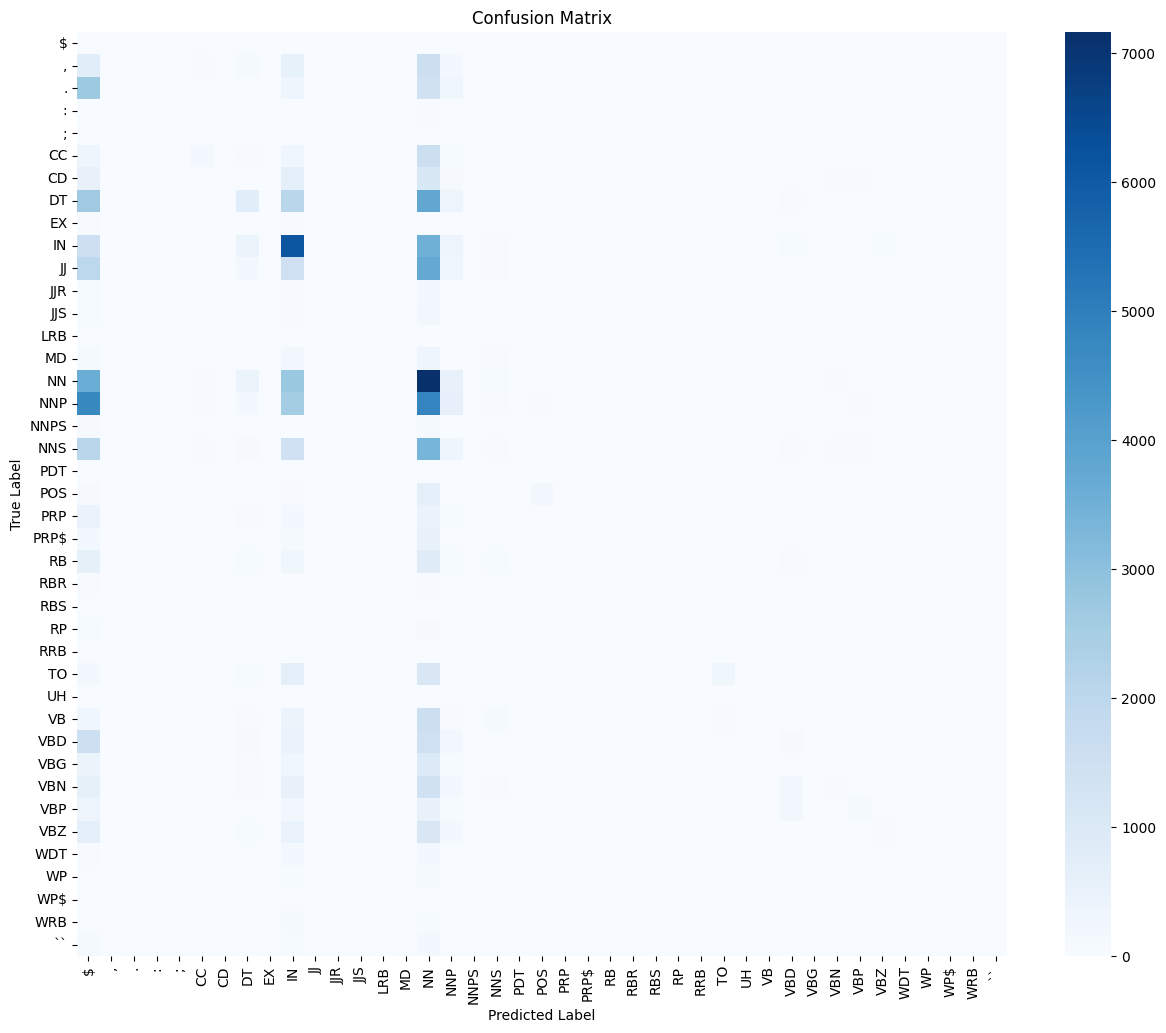

In [ ]:
lstm_accuracy,lstm_f1 = evaluate_model(lstm_model, X_test, y_test, label_encoder)


150/150 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_

Accuracy: 0.24499163688892267
F1-Score (Weighted): 0.23822662091406774
Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       0.12      0.09      0.11      3313
           2       0.28      0.29      0.28      4789
           3       0.00      0.00      0.00        72
           4       0.00      0.00      0.00        22
           5       0.40      0.51      0.45      2472
           6       0.03      0.02      0.03      2521
           7       0.49      0.52      0.51      9795
           8       0.00      0.00      0.00        75
           9       0.35      0.42      0.38     12189
          10       0.11      0.07      0.08      7806
          11       0.00      0.00      0.00       291
          12       0.00      0.00      0.00       309
          13       0.00      0.00      0.00        67
          14       0.00      0.00      0.00       734
          15       0.22      0.28      0.

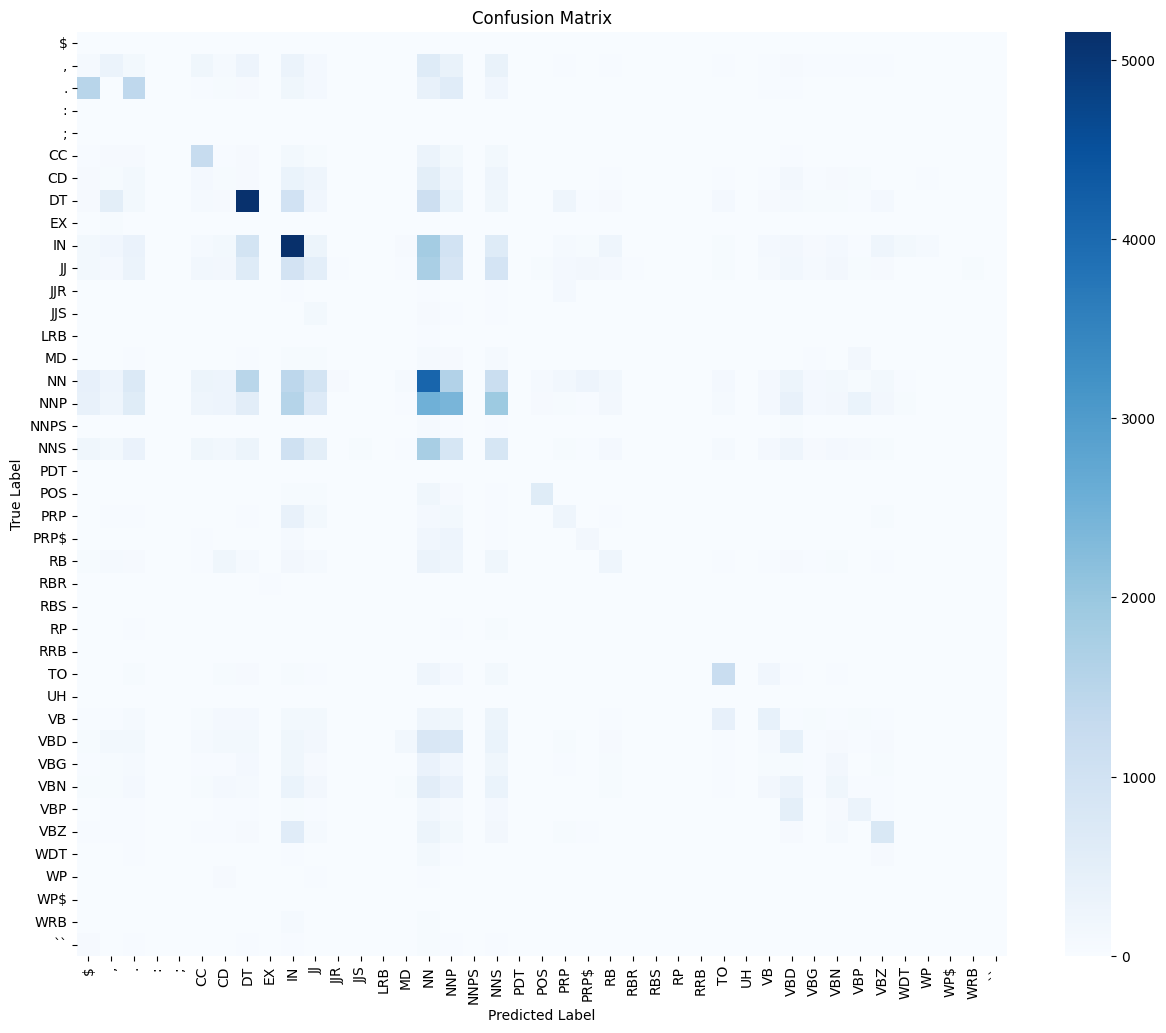

In [ ]:
gru_accuracy,gru_f1 = evaluate_model(gru_model, X_test, y_test, label_encoder)


150/150 ━━━━━━━━━━━━━━━━━━━━ 6s 41ms/step


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_

Accuracy: 0.2690926024481107
F1-Score (Weighted): 0.2614303295615997
Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       0.16      0.02      0.04      3313
           2       0.49      0.18      0.27      4789
           3       0.00      0.00      0.00        72
           4       0.00      0.00      0.00        22
           5       0.40      0.49      0.44      2472
           6       0.03      0.02      0.02      2521
           7       0.58      0.58      0.58      9795
           8       0.00      0.00      0.00        75
           9       0.42      0.46      0.44     12189
          10       0.12      0.10      0.11      7806
          11       0.00      0.00      0.00       291
          12       0.00      0.00      0.00       309
          13       0.00      0.00      0.00        67
          14       0.00      0.00      0.00       734
          15       0.22      0.36      0.27

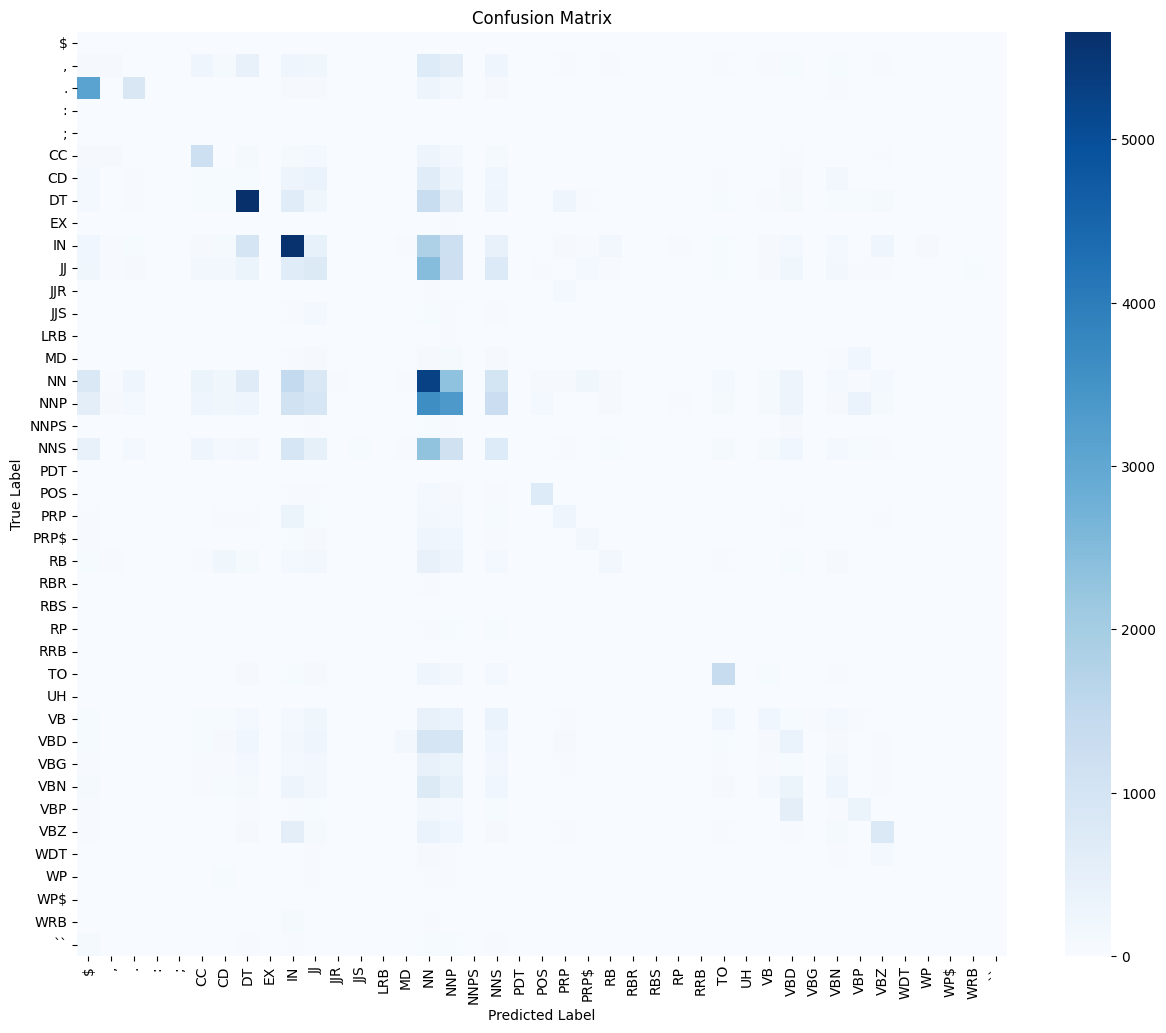

In [ ]:
bilstm_accuracy,bilstm_f1 = evaluate_model(bilstm_model, X_test, y_test, label_encoder)

Model Comparison Table:
     Model  Accuracy  F1 Score
0      RNN  0.263352  0.251332
1     LSTM  0.148939  0.110511
2      GRU  0.244992  0.238227
3  BiLISTM  0.269093  0.261430


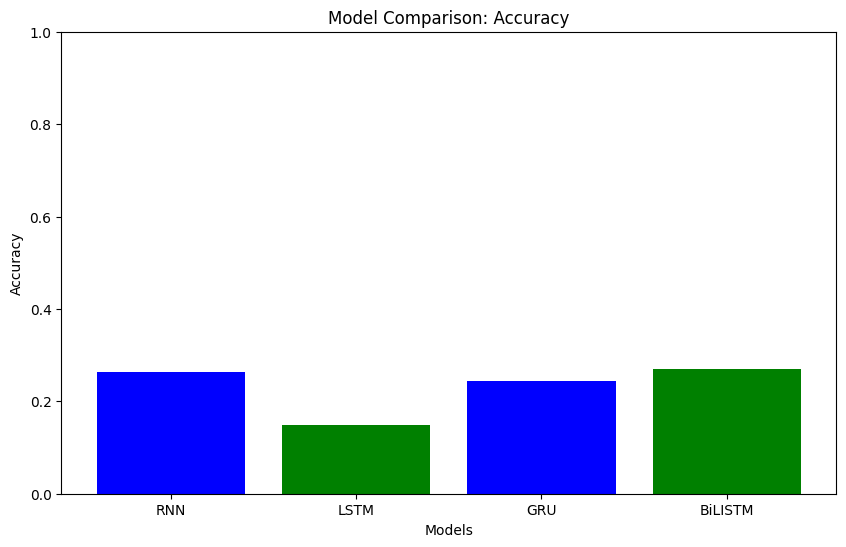

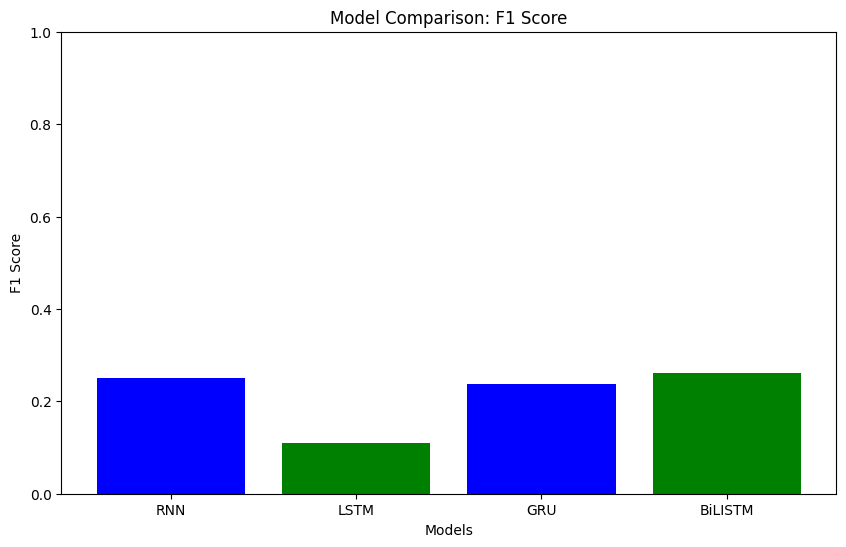

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt


results = pd.DataFrame({
    'Model': ['RNN', 'LSTM', 'GRU', 'BiLISTM'],
    'Accuracy': [rnn_accuracy, lstm_accuracy, gru_accuracy, bilstm_accuracy],
    'F1 Score': [rnn_f1, lstm_f1, gru_f1, bilstm_f1]
})


# Display the comparison table
print("Model Comparison Table:")
print(results)

# Plotting the comparison for accuracy
plt.figure(figsize=(10, 6))
plt.bar(results['Model'], results['Accuracy'], color=['blue', 'green'])
plt.title('Model Comparison: Accuracy')
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.ylim(0, 1)
plt.show()

# Plotting the comparison for f1

plt.figure(figsize=(10, 6))
plt.bar(results['Model'], results['F1 Score'], color=['blue', 'green'])
plt.title('Model Comparison: F1 Score')
plt.xlabel('Models')
plt.ylabel('F1 Score')
plt.ylim(0, 1)
plt.show()
